## Algoritms #2
## Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

* [График зависимости весов признаков от lambda с учетом L2-регуляризации](#l2)
* [Проблема совместного использования нормализации и стандартизации](#nstprob)
* [Градиентный спуск с L1 (Ridge) регуляризацией](#l1)

In [266]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import datasets
np.random.seed(42)

import sklearn.linear_model
%matplotlib inline

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [244]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [251]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Полный градиентного спуска
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

# Cтохастический градиентный спуск (батчами)
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [252]:
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])

In [264]:
%%time
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [48.91681052  4.8915443   3.56156795  3.8499849 ] 87.4329345137557
200 [55.49432078  5.33036005  2.80302055  4.26670749] 27.656479999808578
300 [56.36662727  5.59985122  2.1909834   4.6361838 ] 26.03323920839898
400 [56.48231217  5.77929046  1.70460926  4.96265786] 25.636898918337284
500 [56.49765425  5.9033978   1.31509542  5.24278616] 25.389269316494346
600 [56.49968891  5.99233473  1.00141879  5.47886176] 25.226134999562497
700 [56.49995874  6.05808366  0.74784021  5.67556519] 25.118104185781785
800 [56.49999453  6.10795549  0.54230134  5.83826339] 25.046430119208495
900 [56.49999927  6.14655407  0.37539852  5.9721875 ] 24.9988370428541
1000 [56.4999999   6.1768842   0.23970116  6.0820742 ] 24.967221986593543
Wall time: 38.9 ms


array([56.4999999 ,  6.1768842 ,  0.23970116,  6.0820742 ])

In [265]:
%%time
eval_sgd_model(X_st, y, iterations=1000, qty_in_batch=5, alpha=1e-2)

100 [49.20706965  5.15492777  2.33073656  4.94478532] 83.27672572933488
200 [55.52874547  5.54500745  1.77853387  5.13914299] 32.10249839663888
300 [56.3727478   5.77840849  1.35143053  5.34459401] 30.291529681537583
400 [56.48532021  5.92804228  1.01860775  5.54051813] 29.22331340307148
500 [56.5002531   6.02723777  0.75485918  5.71503355] 28.321224286686732
600 [56.50217126  6.09547318  0.5439028   5.86533748] 27.580939229569015
700 [56.5023685   6.14412203  0.37415153  5.99228335] 26.97830029862094
800 [56.50234848  6.17992931  0.23699466  6.09820437] 26.48878189973585
900 [56.50230894  6.20699378  0.12586081  6.18589358] 26.091398840023068
1000 [5.65022741e+01 6.22788352e+00 3.56386156e-02 6.25811785e+00] 25.768818569623438
Wall time: 66.8 ms


array([5.65022741e+01, 6.22788352e+00, 3.56386156e-02, 6.25811785e+00])

L1 регуляризация

L2 регуляризация

In [555]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W)
        
        if i % (iterations / 10) == 0:
            pass
#             print(i, W, err)
    return W

In [556]:
%%time
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

Wall time: 254 ms


array([56.49717514,  6.30231281, -0.35421823,  6.56976553])

In [557]:
%%time
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49764423  5.99605459  0.77740863  5.70442484] 25.124860319409088
1000 [5.64999999e+01 6.21641748e+00 4.42233746e-02 6.24433290e+00] 24.932812282279986
1500 [56.5         6.27311503 -0.21257504  6.45295351] 24.90827066623998
2000 [56.5         6.29236542 -0.30464389  6.52877568] 24.9050919928353
2500 [56.5         6.29923521 -0.33776469  6.55610464] 24.904680172821127
3000 [56.5         6.3017049  -0.34968529  6.56594338] 24.904626818279773
3500 [56.5         6.30259369 -0.35397596  6.56948485] 24.904619905776016
4000 [56.5         6.30291359 -0.35552035  6.57075957] 24.90461901020633
4500 [56.5         6.30302874 -0.35607624  6.5712184 ] 24.904618894178192
5000 [56.5         6.30307018 -0.35627633  6.57138355] 24.904618879145826
Wall time: 246 ms


array([56.5       ,  6.30307018, -0.35627633,  6.57138355])

## <left>График зависимости весов признаков от lambda с учетом L2-регуляризации<a class="anchor" id="l2"></a><left>

In [558]:
lambdas = np.linspace(-0.05, 5, 1000)
y_dat = []
for i in range(len(lambdas)):
    y_dat.append(eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=x_dat[i]))

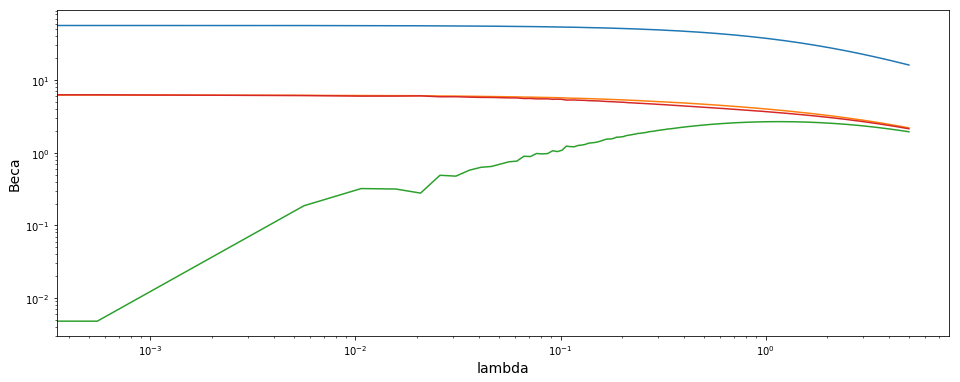

In [559]:
plt.figure(figsize=(16, 6))
plt.xlabel('lambda', fontsize=14)
plt.ylabel('Веса', fontsize=14)
plt.plot(x_dat, y_dat)
plt.yscale('log')
plt.xscale('log')
plt.show()

## <left>Проблема совместного использования нормализации и стандартизации<a class="anchor" id="nstprob"></a><left>

Использование нормализации и стандартизации вместе не имеет практического смысла. Исходя из основных свойств этих приемов масшабирования результатом `нормализациии` является сужение диапазона номинальных признаков от 0 до 1. После `стандартизации` данных, каждый признак будет иметь среднее 0 и дисперсию 1.

В итоге признаки будут отмасштабированы в диапазоне, соответствующем выводу последнего примененного метода масштабирования.
Докажем это:

In [501]:
# Используем один признак датасета X
Xtest = X[2]

# Применим операцию нормализации
xn = (Xtest - Xtest.min()) / (Xtest.max() - Xtest.min())

# Отдельно применим стандартизацию
xst = calc_std_fit(Xtest)

# К уже нормализованным данным применим стандартизацию, а к стандартизованным - нормализацию
x_n_st = calc_std_fit(xn)
x_st_n = (xst - xst.min()) / (xst.max() - xst.min())

print(f"""
Нормализация - min: {xn.min()}, max: {xn.max()}, std: {round(xn.std(), 2)}, mean: {round(xn.mean(),2)}
Стандартизация - min: {round(xst.min(),2)}, max: {round(xst.max(),2)}, std: {round(xst.std(), 2)}, mean: {round(xst.mean(),2)}
Нормализация-Стандартизация - min: {round(x_n_st.min(),2)}, max: {round(x_n_st.max(),2)}, std: {round(x_n_st.std(), 2)}, mean: {round(x_n_st.mean(),2)}
Стандартизация-Нормализация - min: {x_st_n.min()}, max: {x_st_n.max()}, std: {round(x_st_n.std(), 2)}, mean: {round(x_st_n.mean(),2)}
""")


Нормализация - min: 0.0, max: 1.0, std: 0.31, mean: 0.34
Стандартизация - min: -1.08, max: 2.11, std: 1.0, mean: -0.0
Нормализация-Стандартизация - min: -1.08, max: 2.11, std: 1.0, mean: -0.0
Стандартизация-Нормализация - min: 0.0, max: 1.0, std: 0.31, mean: 0.34



## <left>Градиентный спуск с L1 (Ridge) регуляризацией<a class="anchor" id="l1"></a><left>

L1 регуляризация

In [536]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * abs(W).mean())
        
        if i % (iterations / 10) == 0:
            pass
#             print(i, W, err)
    return W

In [537]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([56.49912839,  6.30259266, -0.35635039,  6.57091736])

In [538]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([56.49717514,  6.3023206 , -0.35425586,  6.56979659])